In [1]:
from data_load import data_load
X_train,X_test,y_train,y_test = data_load()

In [2]:
import numpy as np
import joblib

xgboost = joblib.load("model_dataset/xgboost_model18june.pkl")
y_pred = xgboost.predict(X_test)
abs_residuals = np.abs(y_test - y_pred)

In [ ]:
import matplotlib.pyplot as plt

# Scatter vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, abs_residuals, alpha=0.5)
plt.xlabel("Predicted Value")
plt.ylabel("Absolute Residual")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter vs true values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, abs_residuals, alpha=0.5)
plt.xlabel("True Value")
plt.ylabel("Absolute Residual")
plt.title("Residuals vs True Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter vs every feature
for col in X_test.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test[col], abs_residuals, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Absolute Residual")
    plt.title(f"Residuals vs {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
df_combined = X_test.copy()
df_combined['y_true'] = y_test
df_combined['y_pred'] = y_pred

In [4]:
df_combined_sorted = df_combined.sort_values(by='y_pred', ascending=False)

In [5]:
df_combined_sorted

,room_type_id,bedroom_type_id,height,balconies,area,floor,total_floors,views,is_old,can_exchanged,...,urban_Isani,urban_Krtsanisi,urban_Mtatsminda,urban_Nadzaladevi,urban_Saburtalo,urban_Samgori,urban_Vake,urban_Vashlijvari,y_true,y_pred
15602,5,3,3.2,-1,178.0,3,5,29,0,0,...,0,0,1,0,0,0,0,0,3820,4113.695801
21215,3,2,0.0,2,96.0,6,12,14,0,0,...,0,0,0,0,0,0,1,0,3698,3878.489990
18796,9,4,0.0,3,287.0,12,21,43,0,0,...,0,0,0,0,0,0,1,0,3833,3778.868164
21084,3,2,0.0,1,80.0,2,10,21,0,0,...,0,0,0,0,0,0,1,0,4000,3773.177246
20703,3,2,0.0,-1,117.0,10,13,39,0,0,...,0,0,0,0,0,0,1,0,3983,3761.718506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,5,4,0.0,1,219.0,1,16,35,0,0,...,0,0,0,0,0,0,0,0,909,572.916077
22978,3,2,3.2,1,228.0,2,2,4,0,0,...,0,0,0,1,0,0,0,0,570,564.767944
22894,8,7,3.0,-1,217.0,1,2,4,0,0,...,0,0,0,1,0,0,0,0,650,555.290833
31988,5,3,0.0,1,121.0,2,2,392,0,0,...,0,0,0,0,0,1,0,0,579,545.549255


In [31]:
df_1 = df_combined_sorted[df_combined_sorted['y_true']<3000]
df_2 = df_combined_sorted[df_combined_sorted['y_true']>3000]

In [39]:
means_part1 = df_1.mean()
stds_part1 = df_1.std()

means_part2 = df_2.mean()
stds_part2 = df_2.std()

median_part1 = df_1.median()
median_part2 = df_2.median()

In [45]:
summary_stats = pd.DataFrame({
    'median_part1': median_part1,
    'std_part1': stds_part1,
    'median_part2': median_part2,
    'std_part2': stds_part2
})

summary_stats

,median_part1,std_part1,median_part2,std_part2
room_type_id,3.000000,1.189925,3.000000,1.348922
bedroom_type_id,2.000000,0.994298,2.000000,1.062208
height,0.000000,26.806521,0.000000,1.397777
balconies,1.000000,1.235509,1.000000,1.372299
area,73.000000,54.631086,105.500000,53.845828
...,...,...,...,...
urban_Samgori,0.000000,0.241221,0.000000,0.000000
urban_Vake,0.000000,0.282372,1.000000,0.464397
urban_Vashlijvari,0.000000,0.125189,0.000000,0.000000
y_true,1467.000000,476.166771,3400.500000,356.233186


In [46]:
summary_stats['median_diff'] = np.abs(summary_stats['median_part1']-summary_stats['median_part2'])

In [47]:
summary_stats.sort_values(by='median_diff', ascending=False, inplace=True)

In [48]:
summary_stats

,median_part1,std_part1,median_part2,std_part2,median_diff
y_true,1467.000000,476.166771,3400.500000,356.233186,1933.500000
y_pred,1488.985474,444.006073,2898.630859,436.329407,1409.645386
fast_food_nearby_1km,42.000000,52.343445,86.000000,56.679795,44.000000
user_statements_count,155.000000,274.739259,198.000000,310.095722,43.000000
created_days_ago,30.000000,154.919427,65.500000,269.985242,35.500000
...,...,...,...,...,...
has_gas,1.000000,0.431146,1.000000,0.422087,0.000000
has_color,0.000000,0.144166,0.000000,0.000000,0.000000
room_type_id,3.000000,1.189925,3.000000,1.348922,0.000000
for_special_people,0.000000,0.248776,0.000000,0.319942,0.000000


In [7]:
y_binary = (y_train > 3000).astype(int)

In [27]:
np.mean(df_combined_sorted[df_combined_sorted['y_true']>3000]['true_ratio'])

np.float64(0.2969830295418919)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model
rf.fit(X_train, y_binary)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


                   Feature  Importance
4                     area    0.035464
7                    views    0.029598
6             total_floors    0.028872
166       created_days_ago    0.028138
5                    floor    0.026284
..                     ...         ...
174   word_with_renovation    0.003452
260       build_year_+2000    0.003446
207        heating_type_-1    0.003390
114      malls_nearby_500m    0.003368
162  fast_food_nearby_100m    0.003318

[100 rows x 2 columns]


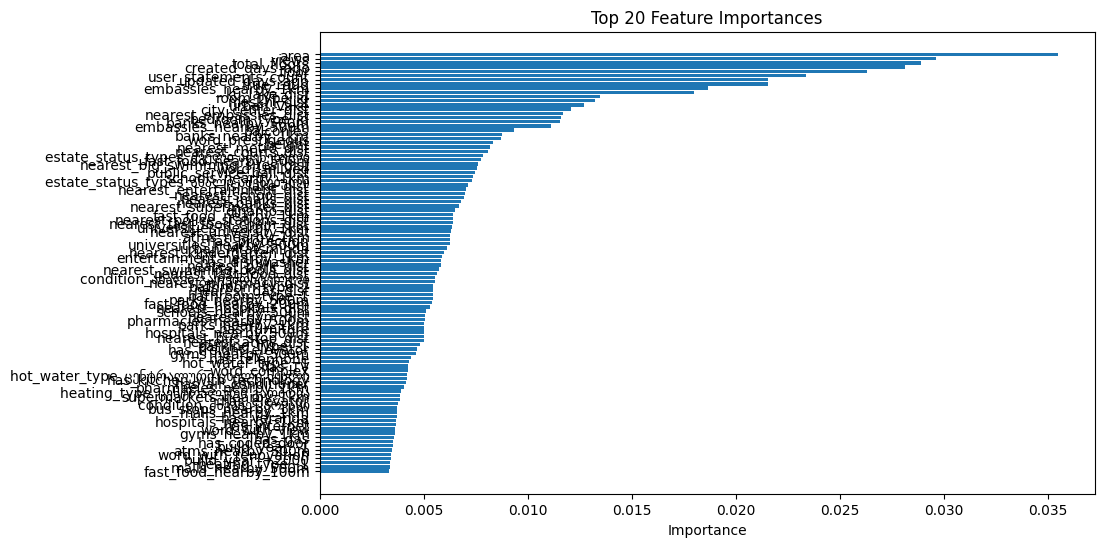

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf.feature_importances_

# If you have a DataFrame for X_train, get column names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Create a DataFrame for easier sorting and plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_imp_df.head(100))

# Optional: Plot top 20 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'].head(100)[::-1], feat_imp_df['Importance'].head(100)[::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.show()

In [12]:
y_test_binary = (y_test > 3000).astype(int)

In [19]:
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test_binary, y_pred))
print("Precision:", precision_score(y_test_binary, y_pred))
print("Recall:", recall_score(y_test_binary, y_pred))
print("F1 Score:", f1_score(y_test_binary, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred))

Accuracy: 0.9828326180257511
Precision: 0.7962962962962963
Recall: 0.2905405405405405
F1 Score: 0.42574257425742573

Confusion Matrix:
 [[6598   11]
 [ 105   43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6609
           1       0.80      0.29      0.43       148

    accuracy                           0.98      6757
   macro avg       0.89      0.64      0.71      6757
weighted avg       0.98      0.98      0.98      6757



In [14]:
np.mean(y_test_binary)

np.float64(0.02190321148438656)

In [15]:
np.mean(y_binary)

np.float64(0.022089022089022088)

In [16]:
from sklearn.metrics import roc_auc_score

y_proba = rf.predict_proba(X_test)[:, 1]  # probability of class 1
roc_auc = roc_auc_score(y_test_binary, y_proba)
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.9338944028004401


In [20]:
X

KeyError: 'price_per_square'